In [1]:
#Chap2

In [18]:
import pymc as pm

lambda_ = pm.Exponential("poisson_param", 1)

data_generator = pm.Poisson("data_generator", lambda_)
data_plus_one = data_generator + 1

In [19]:
print("Children of lambda_: %s" % (lambda_.children))
print("Parents of data_generator: %s" % (data_generator.parents))
print("Parents of data_plus_one: %s" % (data_plus_one.parents))

Children of lambda_: {<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x7f83afb8da58>}
Parents of data_generator: {'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x7f83afb8d710>}
Parents of data_plus_one: {'a': <pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x7f83afb8da58>, 'b': 1}


In [20]:
print("lambda_.value = ", (lambda_.value))
print("data_generator.value = ", (data_generator.value))
print("data_plus_one = ", (data_plus_one.value))

lambda_.value =  0.06534347002807428
data_generator.value =  0
data_plus_one =  1


In [21]:
discrete_uni_var = pm.DiscreteUniform("discrete_uni_var", 0, 4)
print(discrete_uni_var.value)

4


In [22]:
betas = pm.Uniform("betas", 0, 1, size=10)
print(betas.value)

[ 0.92593519  0.97110123  0.93852511  0.44851595  0.6029373   0.17933929
  0.83636685  0.23800018  0.55244755  0.71646553]


In [23]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)
print(lambda_1.value)
print(lambda_2.value)
print(tau.value)
lambda_1.random()
lambda_2.random()
tau.random()
print(lambda_1.value)
print(lambda_2.value)
print(tau.value)

1.6299014725277068
0.39039300677190103
2
2.8520386246896936
1.4231125812000085
0


In [24]:
@pm.deterministic
def some_deterministic(stoch=discrete_uni_var):
    return stoch.value**2
# error occured

AttributeError: 'numpy.ndarray' object has no attribute 'value'

(0, 8)

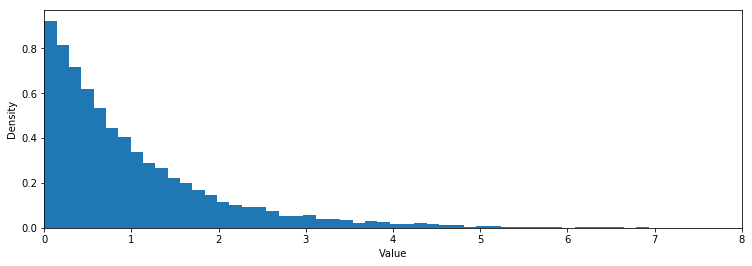

In [25]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(0, 8)

In [26]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

15


In [27]:
alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

2.75424409752 15.202386922


In [28]:
import numpy as np
lambda_ = np.r_[lambda_1 * np.ones(tau), lambda_2 * np.ones(80 - tau)]
print(lambda_)

[  2.7542441    2.7542441    2.7542441    2.7542441    2.7542441
   2.7542441    2.7542441    2.7542441    2.7542441    2.7542441
   2.7542441    2.7542441    2.7542441    2.7542441    2.7542441
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692  15.20238692  15.20238692  15.20238692  15.20238692
  15.20238692

In [29]:
data = pm.rpoisson(lambda_)
print(data)

[ 2  3  3  2  8  4  6  4  2  1  1  1  3  5  3 19 10 15 11 14 10 15 12 16 17
 18 15 13 19 19 10 15 17 15 19 17 15  6 18 13 15 14 18 17 12 22 19 18 11 10
 23 18 18 18 18  7 14 14 18 11 16 12 11 16 12 17 17 16 13 21 15 20 18 18  8
 12 15 17 20 19]


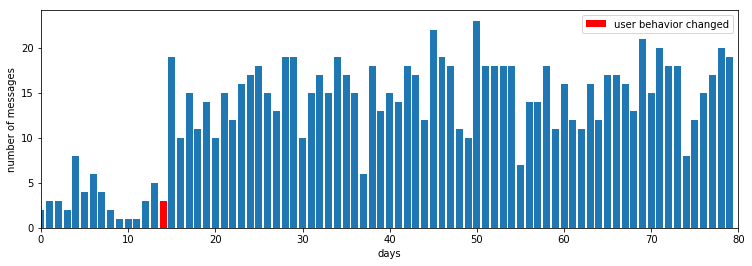

In [53]:
plt.bar(np.arange(80), data)
plt.bar(tau - 1, data[tau-1], color="red", label="user behavior changed")
plt.xlabel("days")
plt.ylabel("number of messages")
plt.xlim(0, 80)
plt.legend()

In [81]:
import pymc as pm
p = pm.Uniform('p', lower=0, upper=1)

# simuration under p=0.05 for compare p_true with frequency.
p_true = 0.05
N = 1500
occurrences = pm.rbernoulli(p_true, N)

print(occurrences)
print(occurrences.sum())

[ True False False ..., False False False]
74


In [82]:
print("What is the observed frequencty in Group A? %.4f" % (occurrences.mean()))
print("Does the observed frequency equal the true frequency? %s" % (occurrences.mean() == p_true))

What is the observed frequencty in Group A? 0.0493
Does the observed frequency equal the true frequency? False


In [83]:
# MCMC
# occurrences is sampling data from berrnoulli distribution using p_true=0.05
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)
mcmc = pm.MCMC([p, obs])
mcmc.sample(20000, 10000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.3 sec

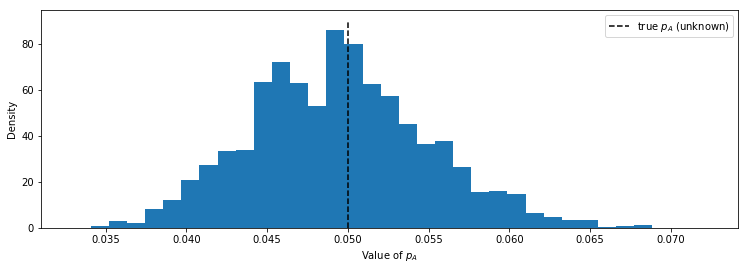

In [84]:
# confirm result of MCMC
figsize(12.5, 4)
plt.vlines(p_true, 0, 90, linestyles="--", label="true $p_A$ (unknown)")
plt.hist(mcmc.trace("p")[:], bins=35, histtype="stepfilled", normed=True)
plt.xlabel("Value of $p_A$")
plt.ylabel("Density")
plt.legend()

In [103]:
import pymc as pm
figsize(12, 4)

true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 750

observations_A = pm.rbernoulli(true_p_A, N_A)
observations_B = pm.rbernoulli(true_p_B, N_B)

print("Obs from Site A: ", observations_A[:30].astype(int))
print("Obs from Site B: ", observations_B[:30].astype(int))

Obs from Site A:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [104]:
print("A mean", observations_A.mean())
print("B mean", observations_B.mean())


A mean 0.0593333333333
B mean 0.036


In [105]:
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)

@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(25000, 10000)

 [-----------------100%-----------------] 25000 of 25000 complete in 2.7 sec

(0, 80)

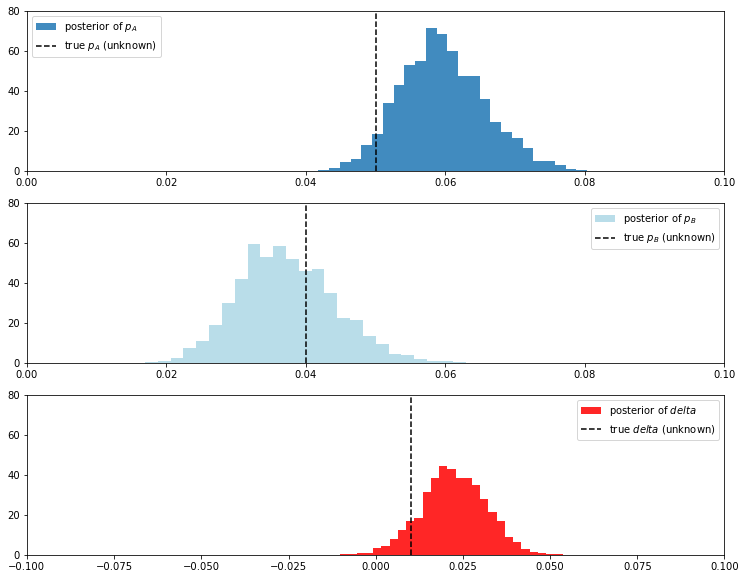

In [111]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

figsize(12.5, 10)

ax = plt.subplot(311)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.85, label='posterior of $p_A$', normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend()
plt.xlim(0, .1)
plt.ylim(0, 80)

ax = plt.subplot(312)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.85, label='posterior of $p_B$', normed=True, color='lightblue')
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend()
plt.xlim(0, .1)
plt.ylim(0, 80)

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85, label='posterior of $delta$', normed=True, color='red')
plt.vlines(true_p_A - true_p_B, 0, 80, linestyle="--", label="true $delta$ (unknown)")
plt.legend()
plt.xlim(-.1, .1)
plt.ylim(0, 80)

In [113]:
print("Probability site A is WORSE than site B: %.3f" % (delta_samples < 0).mean())
print("Probability site A is BETTER than site B: %.3f" % (delta_samples > 0).mean())

Probability site A is WORSE than site B: 0.007
Probability site A is BETTER than site B: 0.993


In [121]:
import pymc as pm
N = 100

# true freq of cheating
p = pm.Uniform("freq_cheating", 0, 1)

# bernoulli distributin of true ar cheat
true_answers = pm.Bernoulli('truths', p, size=N)
print(true_answers.value)

first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
print(first_coin_flips.value)

[False False  True False False False  True False  True  True  True False
 False False False  True False False False False False  True False False
  True False False False False False  True False False False  True False
 False False False  True False False False False False False False False
  True  True False  True False False False False  True False False False
  True  True False False False  True  True False False  True  True False
 False False  True  True  True  True False False False  True False False
 False False  True  True False  True  True False False  True False False
 False  True False False]
[False  True False False  True  True  True False False False False False
 False  True  True  True  True False False  True False False  True False
 False  True False False False  True  True  True  True False False False
 False False  True False False False False False  True  True  True False
 False False False  True  True  True  True False  True  True  True False
  True False  True False 

In [122]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)
print(second_coin_flips.value)

[ True  True False  True  True False  True  True False  True False  True
  True False  True False  True  True False  True False  True  True False
  True False  True  True False False False False False False  True False
  True  True False False False False  True False False False False  True
 False  True  True False False False  True False  True False  True False
 False  True  True False  True  True  True False  True  True  True  True
  True  True False  True  True False  True False False  True False False
  True False  True False  True False False False False  True  True  True
 False  True  True False]


In [124]:
@pm.deterministic
def observed_proportion(t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips):
    # Yesの回答数
    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(N)

# Yesの回答数が35だとする
X = 35
observations = pm.Binomial("obs", N, observed_proportion, observed=True, value=X)

model = pm.Model([p, true_answers, first_coin_flips, second_coin_flips, observed_proportion, observations])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 13.0 sec

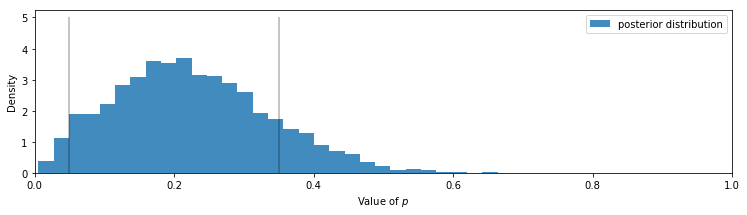

In [128]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, label="posterior distribution")
plt.vlines([.05, .35], [0,0], [5,5], alpha=0.3)
plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.legend()

In [129]:
@pm.deterministic
def p_skewed(p=p):
    return 0.5 * p + 0.25

yes_responses = pm.Binomial("number_cheaters", 100, p_skewed, value=35, observed=True)
model = pm.Model([yes_responses, p_skewed, p])
mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)

 [-----------------100%-----------------] 25000 of 25000 complete in 4.3 sec

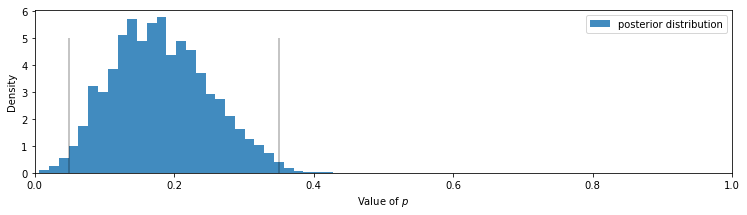

In [130]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, label="posterior distribution")
plt.vlines([.05, .35], [0,0], [5,5], alpha=0.3)
plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.legend()

In [131]:
from os import makedirs
makedirs("data", exist_ok=True)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXknD", "data/challenger_data.csv")

('data/challenger_data.csv', <http.client.HTTPMessage at 0x7f83aa4c6668>)

In [138]:
import numpy as np
np.set_printoptions(precision=3,suppress=True)
challenger_data = np.genfromtxt("data/challenger_data.csv", 
                                skip_header=1, usecols=[1, 2], missing_values="NA", delimiter=",")
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]
print("Temp(F), O-ring failure?")
print(challenger_data)

Temp(F), O-ring failure?
[[ 66.   0.]
 [ 70.   1.]
 [ 69.   0.]
 [ 68.   0.]
 [ 67.   0.]
 [ 72.   0.]
 [ 73.   0.]
 [ 70.   0.]
 [ 57.   1.]
 [ 63.   1.]
 [ 70.   1.]
 [ 78.   0.]
 [ 67.   0.]
 [ 53.   1.]
 [ 67.   0.]
 [ 75.   0.]
 [ 70.   0.]
 [ 81.   0.]
 [ 76.   0.]
 [ 79.   0.]
 [ 75.   1.]
 [ 76.   0.]
 [ 58.   1.]]


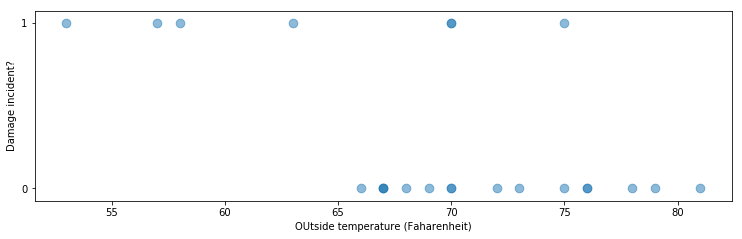

In [151]:
figsize(12.5, 3.5)
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage incident?")
plt.xlabel("OUtside temperature (Faharenheit)")

In [152]:
import pymc as pm
temperature = challenger_data[:, 0]
D = challenger_data[:, 1]

beta = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)
@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta):
    return 1.0 / (1. + np.exp(beta * t + alpha))

p.value

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [153]:
observed = pm.Bernoulli("bernoulli_obs", p, value=D, observed=True)
model = pm.Model([observed, beta, alpha])

map_ = pm.MAP(model)
map_.fit()
mcmc = pm.MCMC(model)
mcmc.sample(120000, 100000, 2)

 [-----------------100%-----------------] 120000 of 120000 complete in 9.2 sec

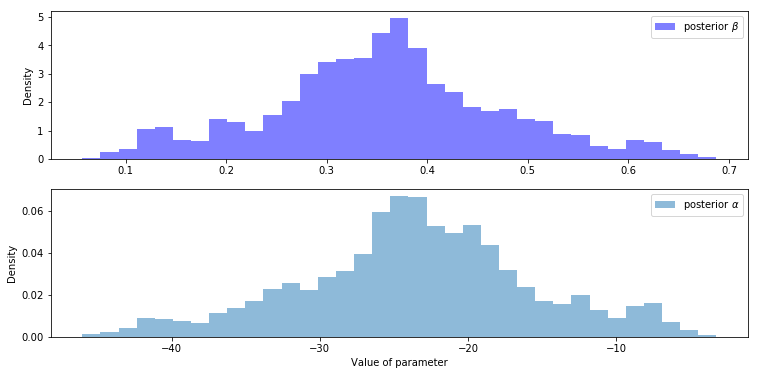

In [170]:
figsize(12.5, 6)

alpha_samples = mcmc.trace('alpha')[:, None]
beta_samples = mcmc.trace('beta')[:, None]

plt.subplot(211)
plt.hist(beta_samples, histtype='stepfilled', bins=35, normed=True, label=r"posterior $\beta$", alpha=0.5, color='blue')
plt.ylabel("Density")
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, normed=True, label=r"posterior $\alpha$", alpha=0.5)
plt.legend()

plt.xlabel("Value of parameter")
plt.ylabel("Density")

In [200]:
figsize(12.5, 10)
# 外気温のサンプリング
t = np.linspace(temperature.min()-5, temperature.max()+5, 50)[:, None]
print(t)

[[ 48.   ]
 [ 48.776]
 [ 49.551]
 [ 50.327]
 [ 51.102]
 [ 51.878]
 [ 52.653]
 [ 53.429]
 [ 54.204]
 [ 54.98 ]
 [ 55.755]
 [ 56.531]
 [ 57.306]
 [ 58.082]
 [ 58.857]
 [ 59.633]
 [ 60.408]
 [ 61.184]
 [ 61.959]
 [ 62.735]
 [ 63.51 ]
 [ 64.286]
 [ 65.061]
 [ 65.837]
 [ 66.612]
 [ 67.388]
 [ 68.163]
 [ 68.939]
 [ 69.714]
 [ 70.49 ]
 [ 71.265]
 [ 72.041]
 [ 72.816]
 [ 73.592]
 [ 74.367]
 [ 75.143]
 [ 75.918]
 [ 76.694]
 [ 77.469]
 [ 78.245]
 [ 79.02 ]
 [ 79.796]
 [ 80.571]
 [ 81.347]
 [ 82.122]
 [ 82.898]
 [ 83.673]
 [ 84.449]
 [ 85.224]
 [ 86.   ]]


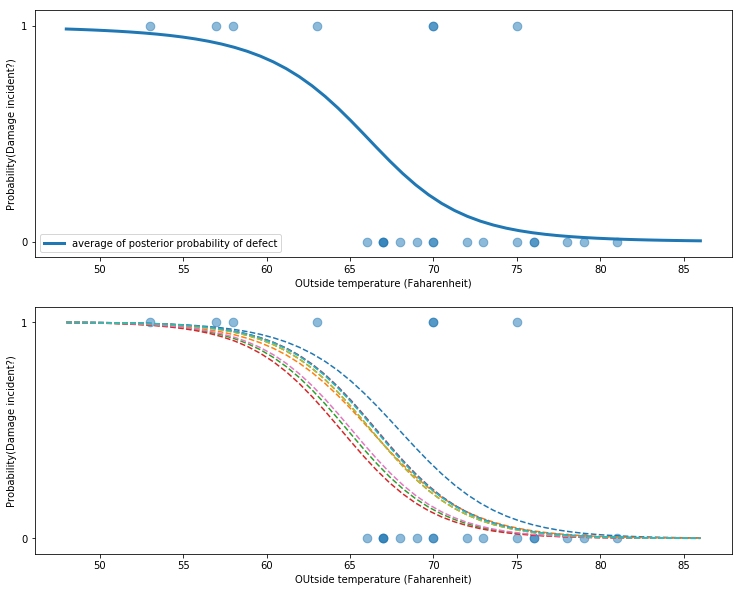

In [201]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))
p_t = logistic(t.T, beta_samples, alpha_samples)

mean_prob_t = p_t.mean(axis=0)

plt.subplot(211)
plt.plot(t, mean_prob_t, lw=3, label="average of posterior probability of defect")
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Probability(Damage incident?)")
plt.xlabel("OUtside temperature (Faharenheit)")
plt.legend()

plt.subplot(212)
for i in range(10):
        plt.plot(t, p_t[i, :], ls="--", label="sampling posterior")
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Probability(Damage incident?)")
plt.xlabel("OUtside temperature (Faharenheit)")

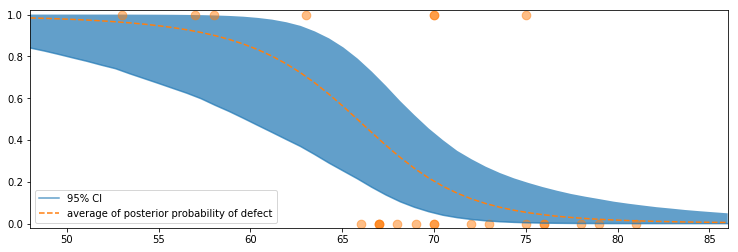

In [207]:
figsize(12.5, 4)
from scipy.stats.mstats import mquantiles

qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7)
plt.plot(t[:, 0], qs[0], label="95% CI", alpha=0.7)

plt.plot(t, mean_prob_t, ls="--", label="average of posterior probability of defect")
plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, alpha=0.5)
plt.legend(loc="lower left")

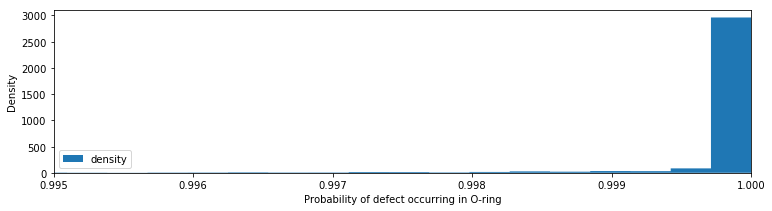

In [213]:
figsize(12.5, 3)
p_31 = logistic(31, beta_samples, alpha_samples)
plt.hist(p_31, bins=1000, normed=True, histtype='stepfilled', label="density")
plt.xlim(0.995, 1)
plt.ylabel("Density")
plt.xlabel("Probability of defect occurring in O-ring")
plt.legend(loc="lower left")

In [215]:
# 推論に使う観測データ
observed = pm.Bernoulli("bernoulli_obs", p, value=D, observed=True)

# シュミレーションするためのサンプリング
simulated = pm.Bernoulli("simulation", p)

N = 10000

mcmc = pm.MCMC([simulated, alpha, beta, observed])
mcmc.sample(N)

 [-----------------100%-----------------] 10000 of 10000 complete in 2.0 sec

In [216]:
simulations = mcmc.trace("simulation")[:].astype(int)
print("Shape of simulations array: ", simulations.shape)

Shape of simulations array:  (10000, 23)


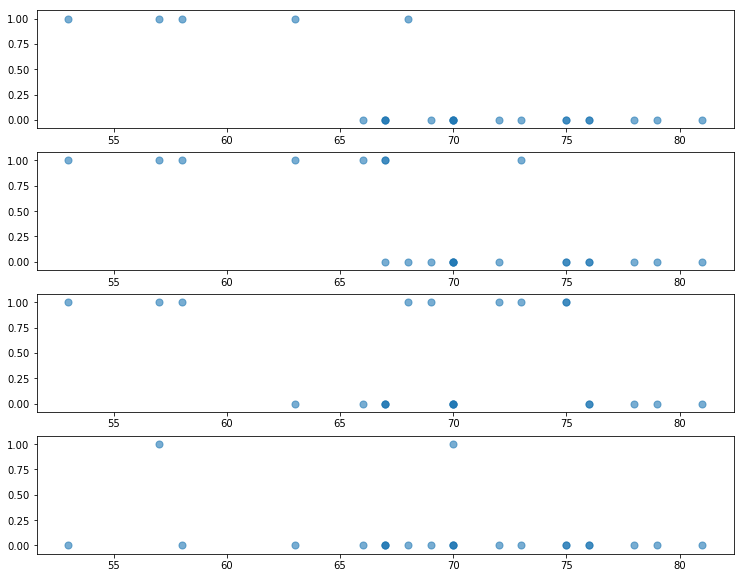

In [219]:
figsize(12.5, 10)
for i in range(4):
    ax = plt.subplot(4, 1, i+1)
    plt.scatter(temperature, simulations[1000 * i, :], s=50, alpha=0.6)

In [220]:
# separation plot
posterior_probability = simulations.mean(axis=0)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXtye", "separation_plot.py")

('separation_plot.py', <http.client.HTTPMessage at 0x7f83a450f240>)

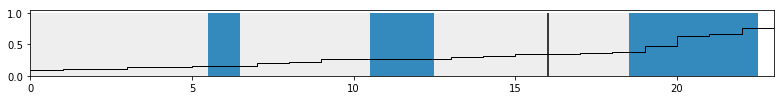

In [221]:
from separation_plot import separation_plot
figsize(11, 1.5)
separation_plot(posterior_probability, D)

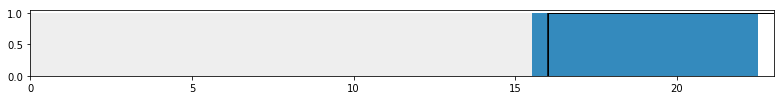

In [224]:
p = D
separation_plot(p, D)

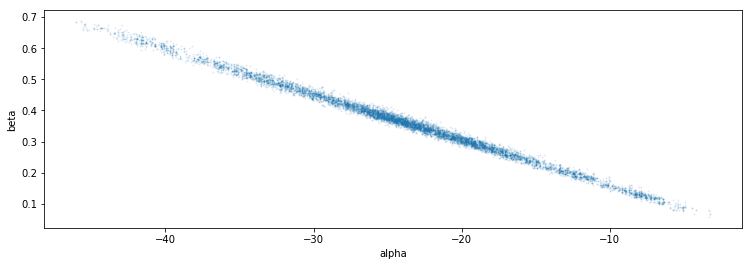

In [225]:
figsize(12.5, 4)
plt.scatter(alpha_samples, beta_samples, alpha=0.1, s=1)
plt.xlabel("alpha")
plt.ylabel("beta")